In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import *
from tkinter import filedialog

In [42]:
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
infiles = filedialog.askopenfilename(multiple=False, title='load spiketimes csv')

%gui tk

In [43]:
df = pd.read_csv(infiles).iloc[:, 1:]

In [44]:
print(f'these are the neuron IDs {list(df.keys())}')

these are the neuron IDs ['neuron 105', 'neuron 106', 'neuron 109', 'neuron 110', 'neuron 111', 'neuron 112', 'neuron 113', 'neuron 118', 'neuron 121', 'neuron 124', 'neuron 126', 'neuron 128', 'neuron 131', 'neuron 132', 'neuron 137', 'neuron 139', 'neuron 145', 'neuron 146', 'neuron 147', 'neuron 148', 'neuron 149', 'neuron 155', 'neuron 156', 'neuron 157', 'neuron 158', 'neuron 166', 'neuron 167', 'neuron 172', 'neuron 173', 'neuron 174', 'neuron 175', 'neuron 176', 'neuron 181', 'neuron 182', 'neuron 183', 'neuron 185', 'neuron 186', 'neuron 187', 'neuron 188', 'neuron 189', 'neuron 190', 'neuron 192', 'neuron 193', 'neuron 194', 'neuron 195', 'neuron 197', 'neuron 198', 'neuron 199', 'neuron 200', 'neuron 201', 'neuron 202', 'neuron 203', 'neuron 204', 'neuron 205', 'neuron 206', 'neuron 207', 'neuron 208', 'neuron 209', 'neuron 210', 'neuron 211', 'neuron 212', 'neuron 213', 'neuron 214', 'neuron 216', 'neuron 217', 'neuron 218', 'neuron 219', 'neuron 220', 'neuron 221', 'neuron 

In [50]:
int(len(list(df.keys()))/2)

39

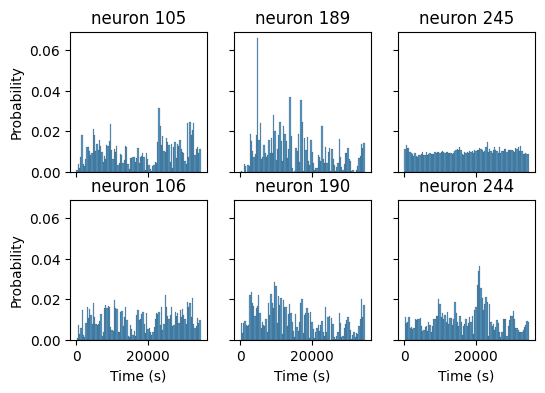

In [55]:
# plot spike distribution for first 2 vs mid 2 vs last 2 neurons
rows = 2
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(6, 4), sharey=True, sharex=True)
for row in range(rows):
    for col in range(cols):
        if col == 0:
            # first 3
            sns.histplot(data=df, x=f'{list(df.keys())[row]}', ax=ax[row, col], 
                         stat='probability', 
                         bins=100)
            ax[row, col].set_title(f'{list(df.keys())[row]}')
        elif col == 1:
            # mid 3
            sns.histplot(data=df, x=f'{list(df.keys())[row+int(len(list(df.keys()))/2)]}', ax=ax[row, col], 
                         stat='probability', 
                         bins=100)
            ax[row, col].set_title(f'{list(df.keys())[row+int(len(list(df.keys()))/2)]}')
        elif col == 2:
            # last 3
            sns.histplot(data=df, x=f'{list(df.keys())[-(row+1)]}', ax=ax[row, col], 
                         stat='probability', 
                         bins=100)        
            ax[row, col].set_title(f'{list(df.keys())[-(row+1)]}')
        if row == rows-1:
            ax[row, col].set_xlabel('Time (s)')
plt.show()
fig.savefig('../temp_figs/example_activity_histogram.png', dpi=300)